# Object Detection using CNN

Objective is to correctly identify the type of fashion item using COnvolutional Neural Network (CNNs). CNN is far better than ANN for object detection as it detects the position independent pattern in the image. With CNN we can expect better results as compared to the fully connected neural network.

### Import required libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

### Convolutional Neural Network Model

This CNN model contain five convolutional filters, two maxpooling filters and two hidden layers.

In [2]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same',
                       input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

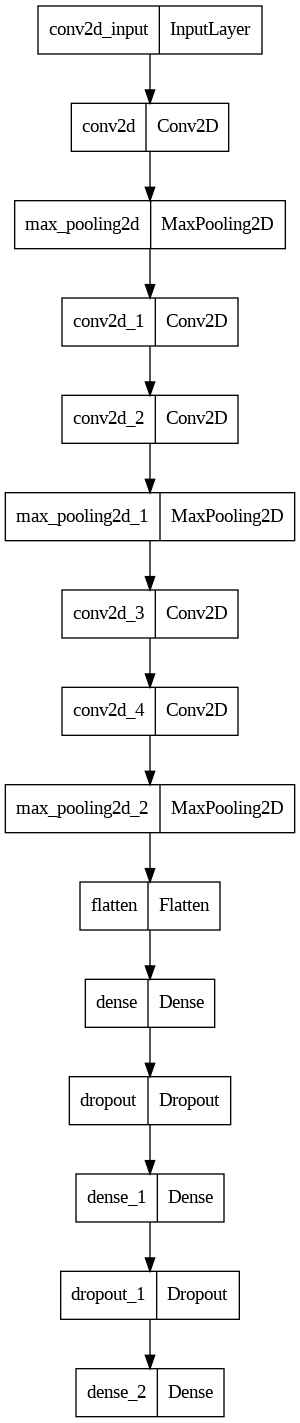

In [4]:
keras.utils.plot_model(model)

### Import the dataset

In [5]:
fminst = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fminst.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [10]:
### Run model using GPU

In [11]:
# Ref: https://www.tensorflow.org/guide/gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized


### Fit CNN model

In [12]:
tensorboard_cb = keras.callbacks.TensorBoard('logs/first')

history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/50
1719/1719 [==============================] - 23s 7ms/step - loss: 1.3516 - accuracy: 0.4999 - val_loss: 0.6864 - val_accuracy: 0.7560
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7915 - accuracy: 0.7116 - val_loss: 0.5197 - val_accuracy: 0.7984
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6512 - accuracy: 0.7650 - val_loss: 0.4661 - val_accuracy: 0.8354
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5793 - accuracy: 0.7941 - val_loss: 0.4250 - val_accuracy: 0.8476
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5343 - accuracy: 0.8120 - val_loss: 0.4032 - val_accuracy: 0.8550
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5014 - accuracy: 0.8254 - val_loss: 0.3644 - val_accuracy: 0.8618
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4706 - accuracy: 0.8361 - val_loss: 0.3563 - val_ac

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 39.5320 - accuracy: 0.8707


[39.531986236572266, 0.8707000017166138]

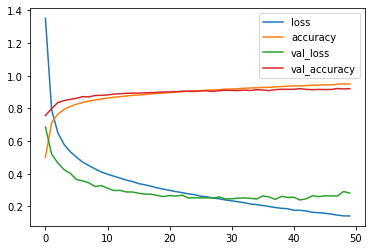

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

With this fundamental architecture and SGD optimizer we have got *92%* of validation accuracy

We can try with ADAM optimizer as it require less memory is more efficient

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
tensorboard_cb = keras.callbacks.TensorBoard('logs/adam')

history1 = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4004 - accuracy: 0.8646 - val_loss: 0.3099 - val_accuracy: 0.8872
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3387 - accuracy: 0.8848 - val_loss: 0.2627 - val_accuracy: 0.8980
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3024 - accuracy: 0.8970 - val_loss: 0.2738 - val_accuracy: 0.8976
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2818 - accuracy: 0.9030 - val_loss: 0.2505 - val_accuracy: 0.9046
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2584 - accuracy: 0.9110 - val_loss: 0.2502 - val_accuracy: 0.9058
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2498 - accuracy: 0.9127 - val_loss: 0.2638 - val_accuracy: 0.9136
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2364 - accuracy: 0.9178 - val_loss: 0.2457 - val_ac

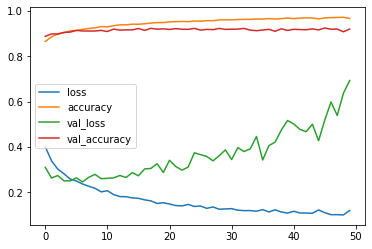

In [17]:
pd.DataFrame(history1.history).plot()

By using ADAM optimizer we have got 96.6% of training accuracy and 92.0% of validation accuracy. We can again increase the validation accuracy by using hyperparameter tuning and the regularization.

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 136.3628 - accuracy: 0.8615


[136.36282348632812, 0.8615000247955322]

Final Accuracy achieved= 86.15%